# Agregacija združevanje in tranformacija podatkov


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

## List comprehations

In [13]:
stevilke = [1,2,3,4,5,6,6, 7]
kvadrati_stevilke = []

for stevilka in stevilke:
    kvadrati_stevilke.append(stevilka**2)

print(kvadrati_stevilke)

[1, 4, 9, 16, 25, 36, 36, 49]


In [20]:
stevilke = [1,2,3,4,5,6,6,7]
kvadrati_stevilke = {stevilka: stevilka**2 for stevilka in stevilke}
print(kvadrati_stevilke)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49}


## Nalaganje in urejenje podatkov

In [21]:
happiness_2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [22]:
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [23]:
happiness_2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

## Agregacija podatkov

Izračun povprečnega scora sreče za posamezno regijo.

In [5]:
# 1. način - ni priporočen!
regions = happiness_2015["Region"].unique()
mean_happiness = {}

for region in regions:
    #1. Split the dataframe into groups.
    region_group = happiness_2015.loc[happiness_2015["Region"] == region]
    #2. Apply a function to each group.
    region_mean_score = region_group["Happiness Score"].mean()
    #3. Combine the results into one data structure.
    mean_happiness[region] = region_mean_score
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

[]

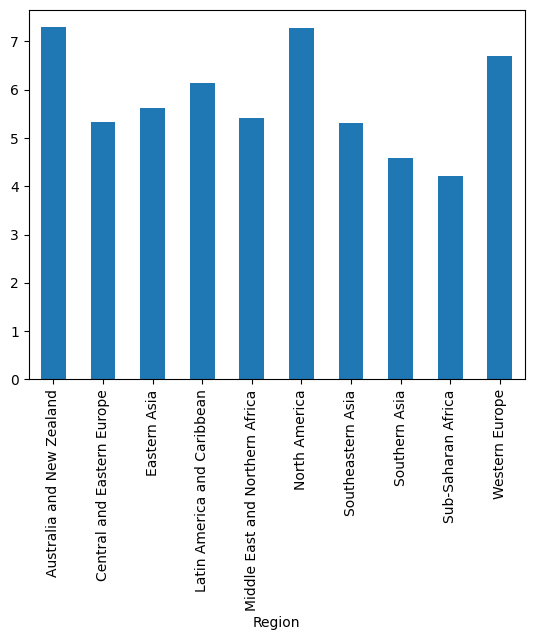

In [6]:
# 2. način: Uporaba GroupBy - PRAVILNO!
happiness_2015.groupby("Region")["Happiness Score"].mean().plot(kind="bar")
plt.plot()

### Več aggregaciij nad istimi podatki

In [7]:
def difference(group):
    return (group.max() - group.min())

happiness_2015.groupby("Region")["Happiness Score"].agg(["mean", "max", "min", difference])

,mean,max,min,difference
Region,,,,
Australia and New Zealand,7.285000,7.286,7.284,0.002
Central and Eastern Europe,5.332931,6.505,4.218,2.287
Eastern Asia,5.626167,6.298,4.874,1.424
Latin America and Caribbean,6.144682,7.226,4.518,2.708
Middle East and Northern Africa,5.406900,7.278,3.006,4.272
North America,7.273000,7.427,7.119,0.308
Southeastern Asia,5.317444,6.798,3.819,2.979
Southern Asia,4.580857,5.253,3.575,1.678
Sub-Saharan Africa,4.202800,5.477,2.839,2.638


## Pivot tabels

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

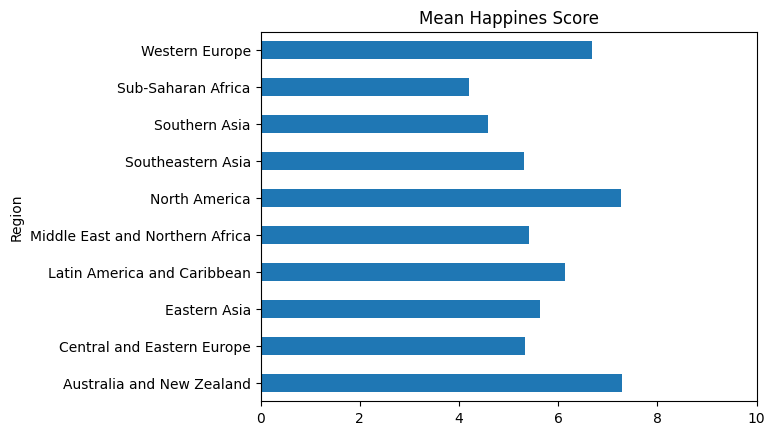

In [32]:
pv_happines = happiness_2015.pivot_table(values="Happiness Score", index="Region", aggfunc="mean", sort=True)
pv_happines.plot(kind="barh", title="Mean Happines Score", xlim=(0,10), legend=False)
plt.show()

## Pandas DataFrame all() Method

In [36]:
happiness_2015["Region"].all()

True

In [37]:
happiness_2015.all()

Country                           True
Region                            True
Happiness Rank                    True
Happiness Score                   True
Standard Error                    True
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                 True
dtype: bool

## Combining Data

In [52]:
happiness_2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness_2015["Year"] = 2015
happiness_2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness_2016["Year"] = 2016
happiness_2017 = pd.read_csv("data/World_Happiness_2017.csv")
happiness_2017["Year"] = 2017

# ureditev podatkov
mapping = {
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
}
happiness_2015 = happiness_2015.rename(mapping, axis="columns")
happiness_2016 = happiness_2016.rename(mapping, axis="columns")
mapping = {
    "Economy  GDP per Capita ": "Economy",
    "Health  Life Expectancy ": "Health",
    "Trust  Government Corruption ": "Trust"
}
happiness_2017.columns = [col.replace(".", " ") for col in  happiness_2017.columns]
happiness_2017 = happiness_2017.rename(mapping, axis="columns")

In [53]:
print("2015: ", happiness_2015.columns)
print("2016: ", happiness_2016.columns)
print("2017: ", happiness_2017.columns)

2015:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017:  Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Trust', 'Dystopia Residual', 'Year'],
      dtype='object')


### Combining Dataframes with the Concat Function

In [59]:
head_2015 = happiness_2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness_2016[['Country','Happiness Score', 'Year', "Family"]].head(3)

In [60]:
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [61]:
head_2016

,Country,Happiness Score,Year,Family
0,Denmark,7.526,2016,1.16374
1,Switzerland,7.509,2016,1.14524
2,Iceland,7.501,2016,1.18326


In [62]:
pd.concat([head_2015, head_2016], axis="rows") # 0

,Country,Happiness Score,Year,Family
0,Switzerland,7.587,2015,NaN
1,Iceland,7.561,2015,NaN
2,Denmark,7.527,2015,NaN
0,Denmark,7.526,2016,1.16374
1,Switzerland,7.509,2016,1.14524
2,Iceland,7.501,2016,1.18326


In [63]:
pd.concat([head_2015, head_2016], axis="columns") # 1

,Country,Happiness Score,Year,Country,Happiness Score,Year,Family
0,Switzerland,7.587,2015,Denmark,7.526,2016,1.16374
1,Iceland,7.561,2015,Switzerland,7.509,2016,1.14524
2,Denmark,7.527,2015,Iceland,7.501,2016,1.18326


In [65]:
pd.concat([head_2015, head_2016], axis="rows", ignore_index=True)

,Country,Happiness Score,Year,Family
0,Switzerland,7.587,2015,NaN
1,Iceland,7.561,2015,NaN
2,Denmark,7.527,2015,NaN
3,Denmark,7.526,2016,1.16374
4,Switzerland,7.509,2016,1.14524
5,Iceland,7.501,2016,1.18326


In [75]:
head_2015_indexed = happiness_2015[['Country','Happiness Score', 'Year']].head(3).set_index("Country")
head_2016_indexed = happiness_2016[['Country','Happiness Score', 'Year', "Family"]].head(4).set_index("Country")
head_2017_indexed =  happiness_2017[['Country','Happiness Score', 'Year', "Family"]].head(5).set_index("Country")
pd.concat([head_2015_indexed, head_2016_indexed, head_2017_indexed], axis="columns") 

,Happiness Score,Year,Happiness Score,Year,Family,Happiness Score,Year,Family
Country,,,,,,,,
Switzerland,7.587,2015.0,7.509,2016.0,1.14524,7.494,2017,1.516912
Iceland,7.561,2015.0,7.501,2016.0,1.18326,7.504,2017,1.610574
Denmark,7.527,2015.0,7.526,2016.0,1.16374,7.522,2017,1.551122
Norway,NaN,NaN,7.498,2016.0,1.12690,7.537,2017,1.533524
Finland,NaN,NaN,NaN,NaN,NaN,7.469,2017,1.540247


## Joining Dataframes with the Merge Function

- pd.merge() function - a function that can execute high performance database-style joins.
- only combines dataframes horizontally (axis=1)
- can only combine two dataframes at a time

In [77]:
head_2015 = happiness_2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness_2016[['Country','Happiness Score', 'Year', "Family"]].head(4)

In [78]:
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [80]:
pd.merge(left=head_2015, right=head_2016, on="Country")

,Country,Happiness Score_x,Year_x,Happiness Score_y,Year_y,Family
0,Switzerland,7.587,2015,7.509,2016,1.14524
1,Iceland,7.561,2015,7.501,2016,1.18326
2,Denmark,7.527,2015,7.526,2016,1.16374


how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
Type of merge to be performed.
- left: use only keys from left frame, similar to a SQL left outer join; preserve key order
- right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
- outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
- inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
- cross: creates the cartesian product from both frames, preserves the order of the left keys.

In [84]:
pd.merge(left=head_2015, right=head_2016, on="Country", how="outer", suffixes=(" 2015", " 2016"))

,Country,Happiness Score 2015,Year 2015,Happiness Score 2016,Year 2016,Family
0,Denmark,7.527,2015.0,7.526,2016,1.16374
1,Iceland,7.561,2015.0,7.501,2016,1.18326
2,Norway,NaN,NaN,7.498,2016,1.12690
3,Switzerland,7.587,2015.0,7.509,2016,1.14524


## Zdruevanje podatkov

In [99]:
happiness_2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness_2015["Year"] = 2015
happiness_2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness_2016["Year"] = 2016
happiness_2017 = pd.read_csv("data/World_Happiness_2017.csv")
happiness_2017["Year"] = 2017

# ureditev podatkov
mapping = {
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
}
happiness_2015 = happiness_2015.rename(mapping, axis="columns")
happiness_2016 = happiness_2016.rename(mapping, axis="columns")
mapping = {
    "Economy  GDP per Capita ": "Economy",
    "Health  Life Expectancy ": "Health",
    "Trust  Government Corruption ": "Trust"
}
happiness_2017.columns = [col.replace(".", " ") for col in  happiness_2017.columns]
happiness_2017 = happiness_2017.rename(mapping, axis="columns")

# Združitev 1. način - concat vertikalno
happiness_concated = pd.concat([happiness_2015, happiness_2016, happiness_2017], axis="rows")
# happiness_concated
# Združitev 2. način - merge horizontalno
happiness_merged = pd.merge(left=happiness_2015, right=happiness_2016, on="Country", how="outer", suffixes=(" 2015", " 2016"))
happiness_merged = pd.merge(left=happiness_merged, right=happiness_2017, on="Country", how="outer")

mapping = {
    "Happiness Rank": "Happiness Rank 2017",
    "Happiness Score": "Happiness Score 2017",
    "Whisker high": "Whisker high 2017", 
    "Whisker low": "Whisker low 2017",
    "Economy": "Economy 2017",
    "Family": "Family 2017",
    "Health": "Health 2017",
    "Freedom": "Freedom 2017",
    "Generosity": "Generosity 2017",
    "Trust": "Trust 2017",
    "Dystopia Residual": "Dystopia Residual 2017"
}
happiness_merged = happiness_merged.rename(mapping, axis="columns")
happiness_merged = happiness_merged.drop(columns=["Standard Error", "Lower Confidence Interval", "Upper Confidence Interval", \
                                                  "Year 2016", "Year 2015", "Year", "Whisker high 2017", "Whisker low 2017"])
happiness_merged.info()
# https://pastebin.com/FfRmqX2F

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 166 non-null    object 
 1   Region 2015             158 non-null    object 
 2   Happiness Rank 2015     158 non-null    float64
 3   Happiness Score 2015    158 non-null    float64
 4   Economy 2015            158 non-null    float64
 5   Family 2015             158 non-null    float64
 6   Health 2015             158 non-null    float64
 7   Freedom 2015            158 non-null    float64
 8   Trust 2015              158 non-null    float64
 9   Generosity 2015         158 non-null    float64
 10  Dystopia Residual 2015  158 non-null    float64
 11  Region 2016             157 non-null    object 
 12  Happiness Rank 2016     157 non-null    float64
 13  Happiness Score 2016    157 non-null    float64
 14  Economy 2016            157 non-null    fl

In [102]:
# izračun povprečneha Happiness Scora po letih -> happiness_concated
happiness_concated.groupby("Year")["Happiness Score"].mean()

Year
2015    5.375734
2016    5.382185
2017    5.354019
Name: Happiness Score, dtype: float64

## Transforming Data

In [103]:
happiness_merged

,Country,Region 2015,Happiness Rank 2015,Happiness Score 2015,Economy 2015,Family 2015,Health 2015,Freedom 2015,Trust 2015,Generosity 2015,...,Dystopia Residual 2016,Happiness Rank 2017,Happiness Score 2017,Economy 2017,Family 2017,Health 2017,Freedom 2017,Generosity 2017,Trust 2017,Dystopia Residual 2017
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,...,2.14558,141.0,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,...,1.92816,109.0,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,...,3.40904,53.0,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,...,2.09459,140.0,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,...,3.12985,24.0,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,Latin America and Caribbean,23.0,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,...,2.97468,82.0,5.250,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464
162,Vietnam,Southeastern Asia,75.0,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,...,1.94180,94.0,5.074,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
163,Yemen,Middle East and Northern Africa,136.0,4.077,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,...,1.97295,146.0,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
164,Zambia,Sub-Saharan Africa,85.0,5.129,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,...,2.58991,116.0,4.514,0.636407,1.003187,0.257836,0.461603,0.249580,0.078214,1.826705


In [113]:
def label(element, value=7):
    if element > value:
        return "Hight"
    else:
        return "Low"

happiness_merged["happines_labled"] = happiness_merged["Happiness Score 2015"].map(label)
happiness_merged["happines_labled"] = happiness_merged["Happiness Score 2015"].apply(label, value=6)

factors = ["Economy 2015", "Family 2015", "Health 2015", "Freedom 2015"]
happiness_merged[factors].map(label).head()


,Economy 2015,Family 2015,Health 2015,Freedom 2015
0,Low,Low,Low,Low
1,Low,Low,Low,Low
2,Low,Low,Low,Low
3,Low,Low,Low,Low
4,Low,Low,Low,Low


In [124]:
def calculate_sum_score(row):
    final_sum = 0.3* row["Happiness Score 2015"] + 0.35 * row["Happiness Score 2016"] + 0.35 * row["Happiness Score 2017"]
    return final_sum


happiness_merged["total_score"] = happiness_merged.apply(lambda row: calculate_sum_score(row), axis=1)
happiness_merged.sort_values(by="total_score", ascending=False).head(10)

,Country,Region 2015,Happiness Rank 2015,Happiness Score 2015,Economy 2015,Family 2015,Health 2015,Freedom 2015,Trust 2015,Generosity 2015,...,Happiness Score 2017,Economy 2017,Family 2017,Health 2017,Freedom 2017,Generosity 2017,Trust 2017,Dystopia Residual 2017,happines_labled,total_score
142,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Hight,7.52715
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Hight,7.52490
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Hight,7.52005
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Hight,7.51885
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,...,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Hight,7.43050
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,Hight,7.38010
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,...,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Hight,7.36400
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,...,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Hight,7.31260
141,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,...,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Hight,7.31045
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,...,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Hight,7.29415
